<a href="https://colab.research.google.com/github/JuanMMaldonado/Coder-Data-Science/blob/main/Desafio_11_ProyectoDS_ParteII_MaldonadoMamaniCardenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storytelling sobre Estado de Inventario


In [ ]:
# Abstracto con Motivacion y Audiencia

El dataset seleccionado consiste en el inventario actual de una compañía multinacional dedicada a la venta de calzado, indumentaria y accesorios. Dicho estado de inventario se monitorea y trabaja a traves de SAP, en donde se unifica y trabaja todo el inventario de la compañia. El inventario puede dividirse segun su "tipo de inventario", es decir, en producto físico en el deposito (stock on-hand), producto en tránsito (en transporte desde fabrica al deposito) y producto en la línea de producción (en fabrica de origen). Dicho dataset posee multiples variables cualitativas, y muy pocas cuantitativas.

El objetivo del trabajo es identificar variables claves, analizar la información mediante métodos de data science y lograr un modelo de predicción de uso comercial que sirva para optimizar tiempos/costos de la compañía.  La audiencia de este trabajo serian la linea gerencial y/o directores con poder de toma de decisión sobre compras futuras.

# Preguntas/Hipótesis

In [ ]:
# Preguntas e Hipotesis que queremos resolver mediante el analisis exploratorio de datos:
#(1) En base al historico de inventario, determinar las categorias de los articulos a invertir a futuro
#(2) En base al historico de inventario, determinar el mix de compra para cada tipo de género
#(3) Que categoria para indumentaria de hombre es la mas vendida?

In [ ]:
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

# Leemos el contenido y lo convertimos en un pandas dataframe
url = 'https://raw.githubusercontent.com/JuanMMaldonado/Coder-Data-Science/main/Data%20Set%20II%20Ok%20format-%20MRP%20Inventory.csv'
df = pd.read_csv(url)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129726 entries, 0 to 129725
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_articulo      129726 non-null  object 
 1   nombre_articulo  129726 non-null  object 
 2   temporada        129726 non-null  object 
 3   division         129726 non-null  object 
 4   edad             129726 non-null  object 
 5   genero           129726 non-null  object 
 6   tipo_producto    129726 non-null  object 
 7   categoria        129726 non-null  object 
 8   precio           129726 non-null  float64
 9   qty_inventario   129726 non-null  int64  
 10  nombre_canal     129726 non-null  object 
 11  nombre_inv       129726 non-null  object 
 12  fecha_pedido     129726 non-null  object 
 13  id_cliente       129726 non-null  object 
 14  nombre_cliente   99016 non-null   object 
 15  id_compra        129726 non-null  int64  
 16  id_fabrica       102743 non-null  obje

In [ ]:
filtered_df = df[(df['division'] == 'apparel') & (df['genero'] == 'Man')]

In [ ]:
df_num = df.select_dtypes('number') # datos númericos
df_num['genero'] = df['genero']
df_num.head()

,precio,qty_inventario,id_compra,genero
0,43199.1,3,295767087,Man
1,43199.1,77,295767087,Man
2,31499.1,3,295767596,Man
3,31499.1,43,295767596,Man
4,10799.1,102,295310823,Man


In [ ]:
df.columns

Index(['id_articulo', 'nombre_articulo', 'temporada', 'division', 'edad',
       'genero', 'tipo_producto', 'categoria', 'precio', 'qty_inventario',
       'nombre_canal', 'nombre_inv', 'fecha_pedido', 'id_cliente',
       'nombre_cliente', 'id_compra', 'id_fabrica', 'nombre_fabrica',
       'ciudad_fabrica', 'pais_fabrica', 'fecha_entrega'],
      dtype='object')

In [ ]:
# Tabla de contingencia genero / division
pd.crosstab(index=df['genero'],
            columns=df['division'], margins=True)

division,Apparel,Footwear,Hardware,All
genero,,,,
Man,44350,20074,450,64874
Unisex,4556,14939,8031,27526
Woman,21906,15004,416,37326
All,70812,50017,8897,129726


In [ ]:
# tabla de contingencia en porcentajes relativos segun clase
data= pd.crosstab(index=df['genero'], columns=df['division']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)
print (data)

division    Apparel   Footwear   Hardware
genero                                   
Man       62.630628  40.134354   5.057885
Unisex     6.433938  29.867845  90.266382
Woman     30.935435  29.997801   4.675733


In [ ]:
! pip install numpy
! pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(data)
contingency_coef = np.sqrt(chi2 / (chi2 + np.sum(expected)))
print("Coeficiente de contingencia:", contingency_coef)

Coeficiente de contingencia: 0.5846882182525531


In [ ]:
# Tabla de contingencia pais_fabrica / categoria
pd.crosstab(index=df['pais_fabrica'],
            columns=df['categoria'], margins=True)

categoria,BASKETBALL,ENERGY & CONSORTIUM,FEAR OF GOD,FOOTBALL,ORIGINALS,OTHER SPECIALTY SPORTS,OUTDOOR,RUNNING,SKATEBOARDING,SPORTSWEAR,SWIM,TENNIS,TRAINING,YEEZY,All
pais_fabrica,,,,,,,,,,,,,,,
ARGENTINA,1,0,0,10195,550,0,0,513,1,775,0,0,2124,0,14159
CAMBODIA,0,0,0,0,0,0,0,0,0,0,0,211,65,0,276
CHINA,0,0,3,16141,0,0,1730,0,0,3050,460,0,6233,0,27617
INDIA,1646,155,0,2111,1602,0,120,1042,133,0,0,29,2229,0,9067
JORDAN,0,0,0,0,0,0,1266,0,0,0,0,0,0,0,1266
MEXICO,409,0,0,3819,438,327,1052,7674,0,7942,0,866,134,0,22661
PAKISTAN,0,0,0,0,0,25,0,0,0,9967,0,0,0,0,9992
TURKEY,0,0,0,1181,4937,65,0,0,0,0,0,0,0,0,6183
VIET NAM,288,0,0,0,0,0,0,3785,85,0,0,0,0,17,4175


In [ ]:
# tabla de contingencia en porcentajes relativos segun clase
data2= pd.crosstab(index=df['pais_fabrica'], columns=df['categoria']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)
print (data2)

categoria     BASKETBALL  ENERGY & CONSORTIUM  FEAR OF GOD   FOOTBALL  \
pais_fabrica                                                            
ARGENTINA       0.042662                  0.0          0.0  30.481060   
CAMBODIA        0.000000                  0.0          0.0   0.000000   
CHINA           0.000000                  0.0        100.0  48.258439   
INDIA          70.221843                100.0          0.0   6.311478   
JORDAN          0.000000                  0.0          0.0   0.000000   
MEXICO         17.448805                  0.0          0.0  11.418064   
PAKISTAN        0.000000                  0.0          0.0   0.000000   
TURKEY          0.000000                  0.0          0.0   3.530959   
VIET NAM       12.286689                  0.0          0.0   0.000000   
VIETNAM         0.000000                  0.0          0.0   0.000000   

categoria     ORIGINALS  OTHER SPECIALTY SPORTS    OUTDOOR    RUNNING  \
pais_fabrica                                      

In [ ]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(data2)
contingency_coef = np.sqrt(chi2 / (chi2 + np.sum(expected)))
print("Coeficiente de contingencia:", contingency_coef)

Coeficiente de contingencia: 0.884646922118464


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

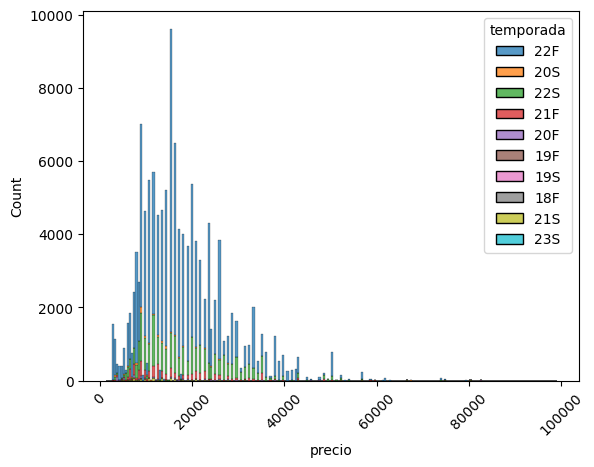

In [ ]:
h = sns.histplot(data=df, x="precio", hue="temporada", multiple="stack") #HISTOGRAMA PRECIO VS TEMPORADA

plt.xticks(rotation = 45)

In [ ]:
# Tabla de contingencia precio / temporada
pd.crosstab(index=df['precio'],
            columns=df['temporada'], margins=True)

temporada,18F,19F,19S,20F,20S,21F,21S,22F,22S,23S,All
precio,,,,,,,,,,,
1259.1,2,0,1,0,0,0,0,0,0,0,3
2339.1,0,0,0,0,0,1,0,0,0,0,1
2699.1,0,0,0,0,1,5,2,0,6,0,14
2879.1,0,0,0,0,0,0,0,1402,0,0,1402
2969.1,0,0,0,0,0,0,0,122,1,0,123
...,...,...,...,...,...,...,...,...,...,...,...
79199.1,0,0,0,0,0,0,0,10,0,0,10
80099.1,0,0,0,8,0,0,4,0,0,0,12
82799.1,0,1,1,0,0,0,3,1,20,0,26


In [ ]:
data3= pd.crosstab(index=df['precio'], columns=df['temporada']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)
print (data3)

temporada    18F       19F        19S       20F       20S       21F       21S  \
precio                                                                          
1259.1     100.0  0.000000  33.333333  0.000000  0.000000  0.000000  0.000000   
2339.1       0.0  0.000000   0.000000  0.000000  0.000000  0.017147  0.000000   
2699.1       0.0  0.000000   0.000000  0.000000  0.104384  0.085734  0.246914   
2879.1       0.0  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
2969.1       0.0  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
...          ...       ...        ...       ...       ...       ...       ...   
74699.1      0.0  0.000000   0.000000  0.000000  0.000000  0.085734  0.493827   
79199.1      0.0  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
80099.1      0.0  0.000000   0.000000  0.940071  0.000000  0.000000  0.493827   
82799.1      0.0  7.692308  33.333333  0.000000  0.000000  0.000000  0.370370   
98999.1      0.0  0.000000  

In [ ]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(data3)
contingency_coef = np.sqrt(chi2 / (chi2 + np.sum(expected)))
print("Coeficiente de contingencia:", contingency_coef)

Coeficiente de contingencia: 0.8733783310978929


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

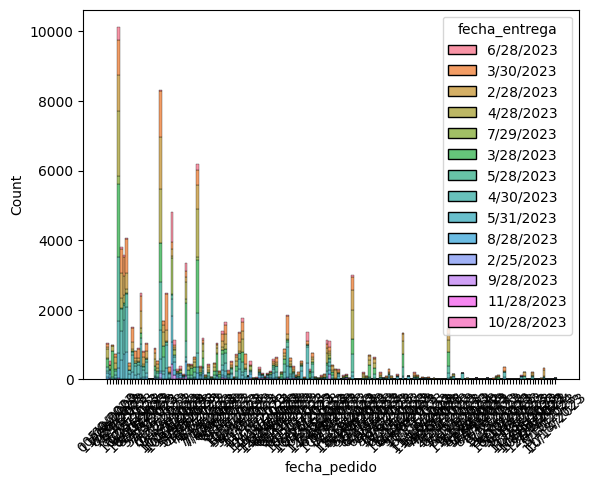

In [ ]:
h = sns.histplot(data=df, x="fecha_pedido", hue="fecha_entrega", multiple="stack") #HISTOGRAMA FECHA_PEDIDO VS FECHA_ENTREGA

plt.xticks(rotation = 45)

In [ ]:
# Tabla de contingencia fecha pedido / fecha entrega
pd.crosstab(index=df['fecha_pedido'],
            columns=df['fecha_entrega'], margins=True)

fecha_entrega,10/28/2023,11/28/2023,2/25/2023,2/28/2023,3/28/2023,3/30/2023,4/28/2023,4/30/2023,5/28/2023,5/31/2023,6/28/2023,7/29/2023,8/28/2023,9/28/2023,All
fecha_pedido,,,,,,,,,,,,,,,
00/00/0000,2,5,4,58,242,65,276,39,126,117,44,16,50,7,1051
1/16/2024,0,0,0,1,0,1,1,1,0,13,13,21,22,9,82
1/19/2024,0,0,0,0,16,0,0,0,0,0,0,0,0,0,16
1/2/2024,0,0,0,5,1,12,8,13,13,51,45,42,69,31,290
1/23/2024,0,0,0,0,0,2,0,0,0,3,4,22,10,6,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/6/2023,0,0,1,48,7,75,6,67,34,54,1,0,0,0,293
9/7/2023,0,0,0,195,13,213,20,307,77,126,17,0,51,13,1032
9/8/2023,0,0,0,29,11,54,21,40,62,22,6,0,5,4,254


In [ ]:
data4= pd.crosstab(index=df['fecha_pedido'], columns=df['fecha_entrega']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)
print (data4)

fecha_entrega  10/28/2023  11/28/2023  2/25/2023  2/28/2023  3/28/2023  \
fecha_pedido                                                             
00/00/0000       2.564103   17.241379   1.092896   0.451116   1.877424   
1/16/2024        0.000000    0.000000   0.000000   0.007778   0.000000   
1/19/2024        0.000000    0.000000   0.000000   0.000000   0.124127   
1/2/2024         0.000000    0.000000   0.000000   0.038889   0.007758   
1/23/2024        0.000000    0.000000   0.000000   0.000000   0.000000   
...                   ...         ...        ...        ...        ...   
9/30/2023        0.000000    0.000000   0.000000   0.007778   0.000000   
9/6/2023         0.000000    0.000000   0.273224   0.373337   0.054306   
9/7/2023         0.000000    0.000000   0.000000   1.516684   0.100853   
9/8/2023         0.000000    0.000000   0.000000   0.225558   0.085337   
9/9/2023         0.000000    0.000000   0.000000   0.046667   0.015516   

fecha_entrega  3/30/2023  4/28/2023  

In [ ]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(data4)
contingency_coef = np.sqrt(chi2 / (chi2 + np.sum(expected)))
print("Coeficiente de contingencia:", contingency_coef)

Coeficiente de contingencia: 0.7992448483122476


In [ ]:
# Nos quedamos con las columnas sin procesar outliers:
columnas1 = df_num.columns.tolist()[:-1]
columnas1

['precio', 'qty_inventario', 'id_compra']

In [ ]:
d_desc = {'id_articulo':'codigo de articulo', 'nombre_articulo':'descripcion del articulo', 'temporada':'temporada caldenario de venta', 'division':'calzado/indumentaria/accesorios', 'edad':'edad de consumidor apuntado',
       'genero':'genero de consumidor apuntado', 'tipo_producto':'breve descr del producto', 'categoria':'segmento del producto', 'precio':'precio de venta', 'qty_inventario':'cantidad en inventario',
       'nombre_canal':'canal de venta', 'nombre_inv':'estado de inventario', 'fecha_pedido':'fecha de preventa', 'id_cliente':'codigo de cliente',
       'nombre_cliente':'nombre de cliente', 'id_compra':'codigo de orden de compra', 'id_fabrica':'codigo de fabrica', 'nombre_fabrica':'nombre de la fabrica',
       'ciudad_fabrica':'ciudad origen de la fabrica', 'pais_fabrica':'pais origen de la fabrica', 'fecha_entrega':'fecha de entrega pactada'}

In [ ]:
df_num.drop_duplicates(inplace=True) #df_num = df_num.drop_duplicates()

In [ ]:
df_num.genero.unique()

array(['Man', 'Woman', 'Unisex'], dtype=object)

In [ ]:
## Convertimos la variable target a valores enteros
df_num['genero'] = df_num.genero.map({'Man':0, 'Woman':1, 'Unisex':3})

In [ ]:
# Split del dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Separamos las caracteristicas/features del target
X = df_num[columnas1] #.drop('y', axis=1)
y = df_num['genero']

In [ ]:
# Entrenamos el split test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (68288, 3)
Tamaño del set de testeo: (17072, 3)


genero genero de consumidor apuntado


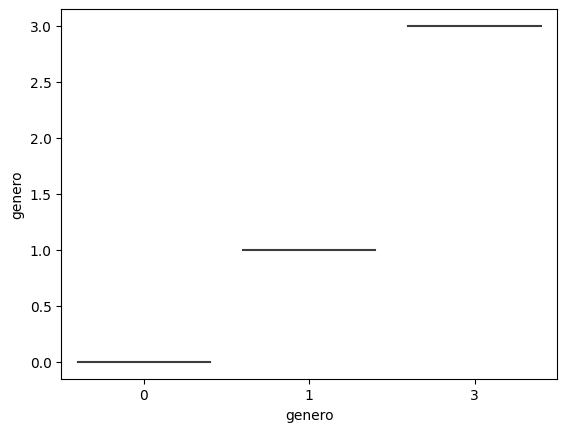

precio precio de venta


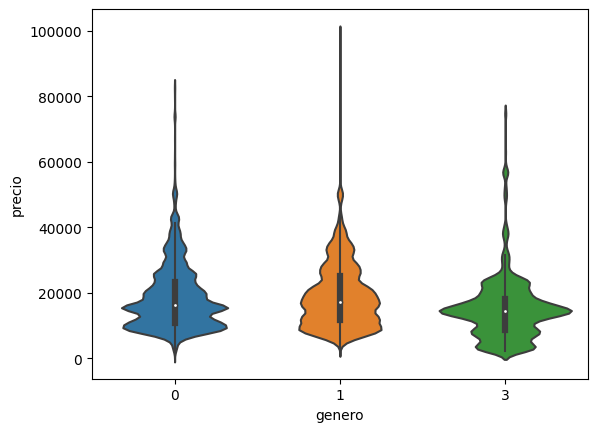

qty_inventario cantidad en inventario


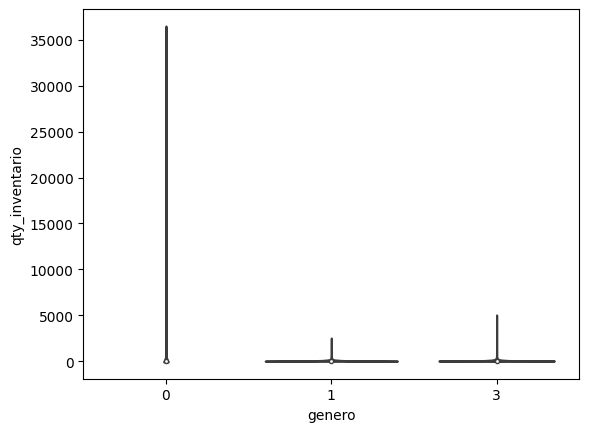

In [ ]:
# Aplicar arbol de decision

for col in ['genero', 'precio', 'qty_inventario']:
    print(col, d_desc[col])
    sns.violinplot(x='genero', y=col, data=df_num)
    plt.show()

# EDA

In [ ]:
# Analisis Exploratorio de Datos

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '22F'),
  Text(1, 0, '20S'),
  Text(2, 0, '22S'),
  Text(3, 0, '21F'),
  Text(4, 0, '20F'),
  Text(5, 0, '19F'),
  Text(6, 0, '19S'),
  Text(7, 0, '18F'),
  Text(8, 0, '21S'),
  Text(9, 0, '23S')])

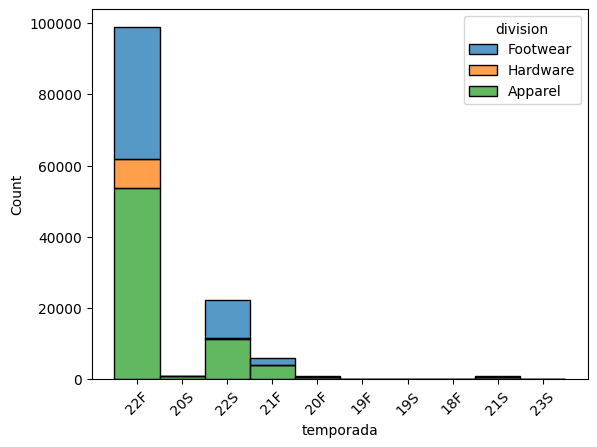

In [ ]:
# Histograma por categorias
h = sns.histplot(data=df, x="temporada", hue="division", multiple="stack")

plt.xticks(rotation = 45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '22F'),
  Text(1, 0, '20S'),
  Text(2, 0, '22S'),
  Text(3, 0, '21F'),
  Text(4, 0, '20F'),
  Text(5, 0, '19F'),
  Text(6, 0, '19S'),
  Text(7, 0, '18F'),
  Text(8, 0, '21S'),
  Text(9, 0, '23S')])

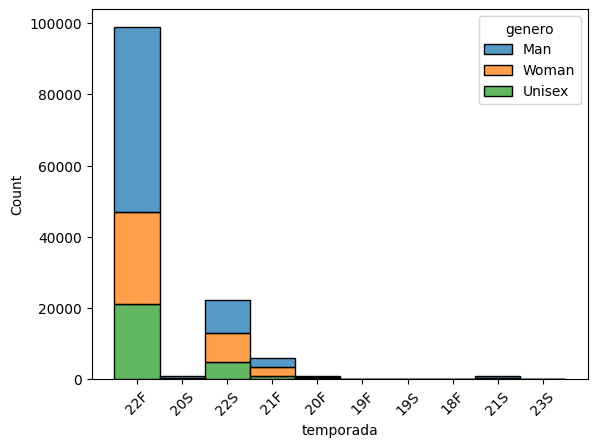

In [ ]:
# Histograma por genero
h = sns.histplot(data=df, x="temporada", hue="genero", multiple="stack")

plt.xticks(rotation = 45)

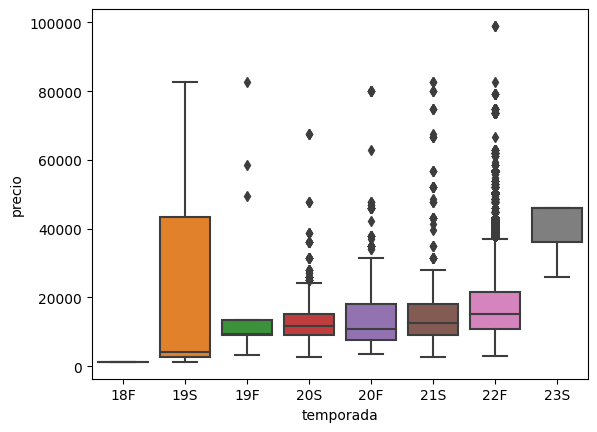

In [ ]:
# Boxplot de precios por temporada
ax = sns.boxplot(x="temporada", y="precio", data=df, order=["18F","19S","19F","20S","20F","21S","22F","23S"])

In [ ]:
filtered_df = df[(df['division'] == 'Apparel') & (df['genero'] == 'Man')]

In [ ]:
grouped = filtered_df.groupby("categoria").sum()

<ipython-input-25-fb448f189d39>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = filtered_df.groupby("categoria").sum()


In [ ]:
print (filtered_df)

In [ ]:
print (df)

       id_articulo nombre_articulo temporada  division   edad  genero  \
0            15110    COPA MUNDIAL       22F  Footwear  Adult     Man   
1            15110    COPA MUNDIAL       22F  Footwear  Adult     Man   
2            19228    MUNDIAL TEAM       22F  Footwear  Adult     Man   
3            19228    MUNDIAL TEAM       22F  Footwear  Adult     Man   
4           280647        ADILETTE       22F  Footwear  Adult     Man   
...            ...             ...       ...       ...    ...     ...   
129721      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   
129722      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   
129723      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   
129724      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   
129725      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   

           tipo_producto   categoria   precio  qty_inventario  ...  \
0                  SHOES    FOOTBALL  43199.1        

In [ ]:
print (grouped)

                             precio  qty_inventario      id_compra
categoria                                                         
BASKETBALL                5449500.9           13938   111822169327
FEAR OF GOD                 99897.3              12      886761244
FOOTBALL                373002737.4         1376440  6947532580401
ORIGINALS                86532086.7          136993  1206189327699
OTHER SPECIALTY SPORTS    1356237.9            1652    10603381158
OUTDOOR                  27159224.4           30492   312139134224
RUNNING                  35966712.6           82758   742721346178
SKATEBOARDING              758644.2            1330    15601249964
SPORTSWEAR               81616405.5          211334  1692051593245
SWIM                      4275987.3           12399   106181795176
TENNIS                    2799676.8            6780    58356582899
TRAINING                 38875644.0          117953   903706562546


In [ ]:
categories = list(grouped.index)
quantities = list(grouped["qty_inventario"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'BASKETBALL'),
  Text(1, 0, 'FEAR OF GOD'),
  Text(2, 0, 'FOOTBALL'),
  Text(3, 0, 'ORIGINALS'),
  Text(4, 0, 'OTHER SPECIALTY SPORTS'),
  Text(5, 0, 'OUTDOOR'),
  Text(6, 0, 'RUNNING'),
  Text(7, 0, 'SKATEBOARDING'),
  Text(8, 0, 'SPORTSWEAR'),
  Text(9, 0, 'SWIM'),
  Text(10, 0, 'TENNIS'),
  Text(11, 0, 'TRAINING')])

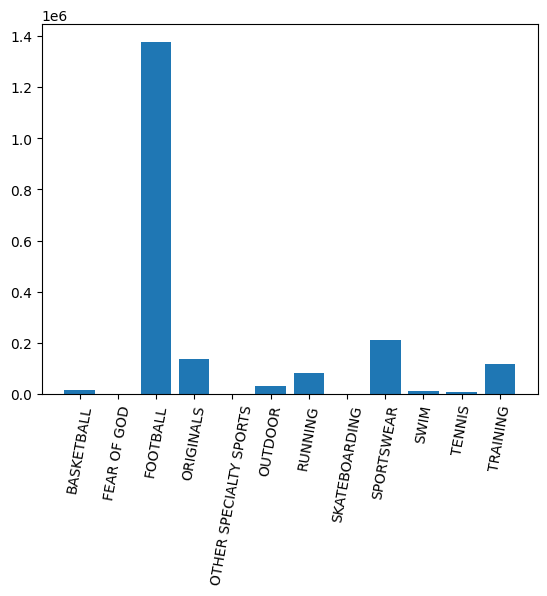

In [ ]:
plt.bar(categories, quantities)
plt.xticks(rotation = 80)

Text(0.5, 1.0, 'Sum of Quantities by Category (Division: Apparel, Gender: Man)')

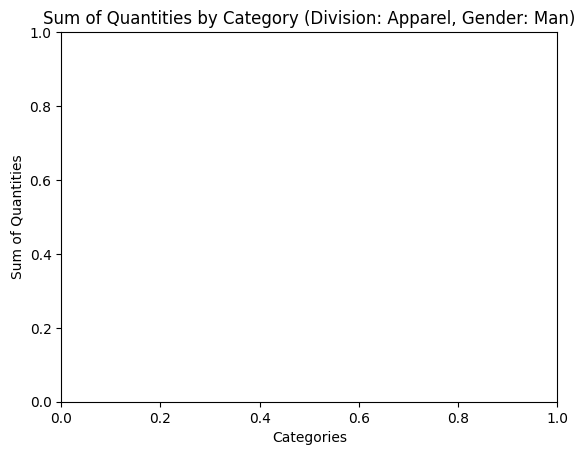

In [ ]:
plt.xlabel("Categories")
plt.ylabel("Sum of Quantities")
plt.title("Sum of Quantities by Category (Division: Apparel, Gender: Man)")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'FOOTBALL'),
  Text(1, 0, 'ORIGINALS'),
  Text(2, 0, 'SPORTSWEAR'),
  Text(3, 0, 'SKATEBOARDING'),
  Text(4, 0, 'YEEZY'),
  Text(5, 0, 'OUTDOOR'),
  Text(6, 0, 'RUNNING'),
  Text(7, 0, 'TRAINING'),
  Text(8, 0, 'SWIM'),
  Text(9, 0, 'STELLA MCCARTNEY'),
  Text(10, 0, 'BASKETBALL'),
  Text(11, 0, 'OTHER SPECIALTY SPORTS'),
  Text(12, 0, 'ENERGY & CONSORTIUM'),
  Text(13, 0, 'MUSIC PARTNERSHIPS'),
  Text(14, 0, 'TENNIS'),
  Text(15, 0, 'FEAR OF GOD')])

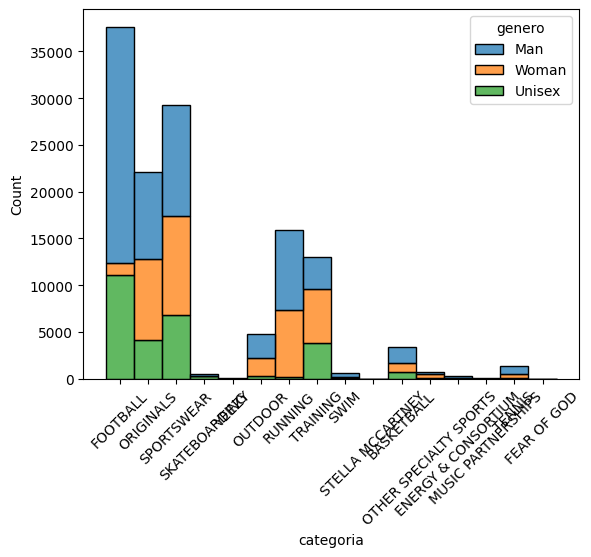

In [ ]:
# Histograma por categorias
h = sns.histplot(data=df, x="categoria", hue="genero", multiple="stack")

plt.xticks(rotation = 45)

# Conclusiones

#(1) En base al historico de inventario, determinar las categorias de los articulos a invertir a futuro:

El porcentaje mayoritario corresponde a la categoria indumentaria.

#(2) En base al historico de inventario, determinar el mix de compra para cada tipo de género:

El porcentaje mayoritario corresponde al género hombre.

#(3) Que categoria para indumentaria de hombre es la mas vendida?

La categoria de hombre mas vendida es "Futbol"


LIMPIEZA DE DATOS

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129721    False
129722    False
129723    False
129724    False
129725    False
Length: 129726, dtype: bool

no existen duplicados

In [ ]:
df["division"].value_counts()

Apparel     70812
Footwear    50017
Hardware     8897
Name: division, dtype: int64

In [ ]:
df["genero"].value_counts()

Man       64874
Woman     37326
Unisex    27526
Name: genero, dtype: int64

In [ ]:
df["categoria"].value_counts()

FOOTBALL                  37636
SPORTSWEAR                29240
ORIGINALS                 22116
RUNNING                   15900
TRAINING                  13011
OUTDOOR                    4798
BASKETBALL                 3338
TENNIS                     1313
OTHER SPECIALTY SPORTS      752
SWIM                        601
SKATEBOARDING               552
ENERGY & CONSORTIUM         306
YEEZY                       121
MUSIC PARTNERSHIPS           27
STELLA MCCARTNEY             12
FEAR OF GOD                   3
Name: categoria, dtype: int64

In [ ]:
df["tipo_producto"].value_counts()

SHOES                         46886
T-SHIRTS                      14452
JERSEYS                       11341
SHORTS                         9389
PANTS                          6833
TRACK TOPS                     5679
SWEATSHIRTS                    4682
TIGHTS                         4160
JACKETS                        3956
SOCKS                          3608
SUITS                          3097
SANDALS/SLIPPERS               3085
BAGS                           2240
POLO SHIRTS                    1663
BALLS                          1525
BRA                            1518
TOPS                           1478
HEADWEAR                       1218
OTHER SHIRTS                    786
SWIMWEAR                        678
OTHER APPAREL                   539
SKIRTS / DRESSES                536
PROTECTION GEAR                 224
APPAREL ACCESSORIES              70
POLARFLEECE APPAREL              51
HARDWARE ACCESSORIES             13
SHOES - LOW (NON FOOTBALL)        7
0                           

In [ ]:
df["temporada"].value_counts()

22F    98912
22S    22342
21F     5832
20S      958
20F      851
21S      810
19F       13
19S        3
23S        3
18F        2
Name: temporada, dtype: int64

In [ ]:
mean = df['precio'].mean()
std = df['precio'].std()
print (mean)
print (std)


17697.980255307342
9603.887271827698


In [ ]:
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std
print (upper_limit)
print (lower_limit)

46509.64207079043
-11113.681560175752


In [ ]:
df['is_outlier'] = np.where((df['precio'] > upper_limit) | (df['precio'] < lower_limit), True, False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129726 entries, 0 to 129725
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_articulo      129726 non-null  object 
 1   nombre_articulo  129726 non-null  object 
 2   temporada        129726 non-null  object 
 3   division         129726 non-null  object 
 4   edad             129726 non-null  object 
 5   genero           129726 non-null  object 
 6   tipo_producto    129726 non-null  object 
 7   categoria        129726 non-null  object 
 8   precio           129726 non-null  float64
 9   qty_inventario   129726 non-null  int64  
 10  nombre_canal     129726 non-null  object 
 11  nombre_inv       129726 non-null  object 
 12  fecha_pedido     129726 non-null  object 
 13  id_cliente       129726 non-null  object 
 14  nombre_cliente   99016 non-null   object 
 15  id_compra        129726 non-null  int64  
 16  id_fabrica       102743 non-null  obje

In [ ]:
data = df[df['is_outlier'] == False]
print (data)

       id_articulo nombre_articulo temporada  division   edad  genero  \
0            15110    COPA MUNDIAL       22F  Footwear  Adult     Man   
1            15110    COPA MUNDIAL       22F  Footwear  Adult     Man   
2            19228    MUNDIAL TEAM       22F  Footwear  Adult     Man   
3            19228    MUNDIAL TEAM       22F  Footwear  Adult     Man   
4           280647        ADILETTE       22F  Footwear  Adult     Man   
...            ...             ...       ...       ...    ...     ...   
129721      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   
129722      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   
129723      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   
129724      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   
129725      S24035       TENSAUR K       22S  Footwear   Kids  Unisex   

           tipo_producto   categoria   precio  qty_inventario  ...  \
0                  SHOES    FOOTBALL  43199.1        

Se eliminaron outliers filas originales 129726 vs 127797